## SynthPop vs. Galaxia Time Tests (plotting only)
Plots for SynthPop paper I

Macy Huston

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [2]:
# Load the time test results
dat = pd.read_csv('sp_gal_time_tests.txt')
dat

,solid_angle,synthpop_time,galaxia_time,synthpop_stars,galaxia_stars
0,0.00000,33.751018,0.000000,0,0
1,0.00001,50.375141,95.690450,10537,5514
2,0.00010,49.852970,53.224480,105902,54149
3,0.00100,82.673813,67.699304,1058917,539183
4,0.01000,395.169473,122.021494,10572604,5386851
5,0.10000,3874.698814,577.566639,105732524,53837474


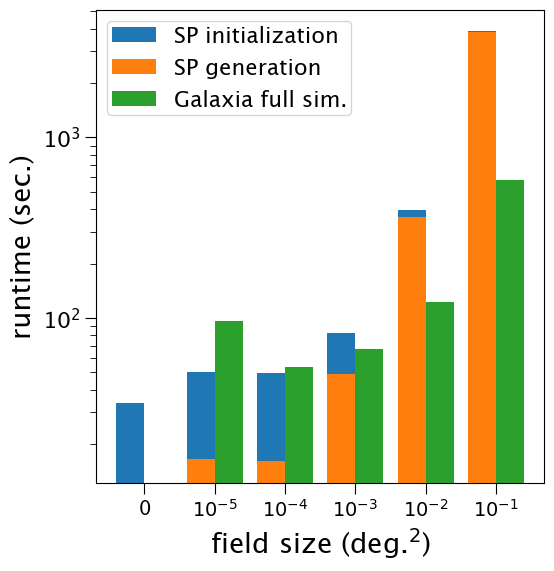

In [3]:
# Plot runtimes
width=0.4
plt.bar(dat.index, dat.synthpop_time,width=width, label='SP initialization')
plt.bar(dat.index, dat.synthpop_time-dat.synthpop_time[0],width=width, label='SP generation')
plt.bar(dat.index+width, dat.galaxia_time,width=width, label='Galaxia full sim.')
plt.xticks(dat.index+width/2, ["0", r"$10^{-5}$",r"$10^{-4}$",r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$"],fontsize=14)
plt.xlabel(r'field size (deg.$^2$)')
plt.ylabel(r'runtime (sec.)')
plt.legend()
plt.tight_layout()
plt.yscale('log')
plt.savefig('validation_figures/runtime.pdf')

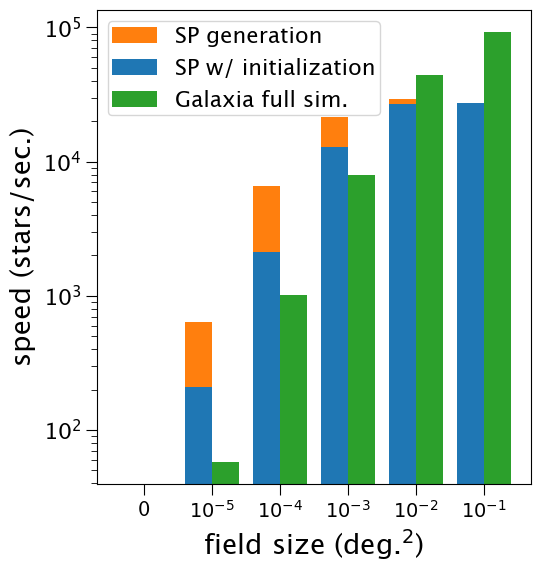

In [4]:
# Plot stars/sec generation rate
width=0.4
plt.bar(dat.index, dat.synthpop_stars/(dat.synthpop_time-dat.synthpop_time[0]),width=width, label='SP generation',color='tab:orange')
plt.bar(dat.index, dat.synthpop_stars/dat.synthpop_time,width=width, label='SP w/ initialization',color='tab:blue')
plt.bar(dat.index+width, dat.galaxia_stars/dat.galaxia_time,width=width, label='Galaxia full sim.',color='tab:green')
plt.xticks(dat.index+width/2, ["0", r"$10^{-5}$",r"$10^{-4}$",r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$"],fontsize=14)
plt.xlabel(r'field size (deg.$^2$)')
plt.ylabel(r'speed (stars/sec.)')
plt.legend(loc=2)
plt.tight_layout()
plt.yscale('log')
plt.savefig('validation_figures/runspeed.pdf')